In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




In [3]:
# Set dataset path
dataset_path = "Global"  # Update if needed

# Categories (binary classification: normal vs sick)
categories = ["Normal_images", "Sick_images"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")  # Only allow valid image files
max_images_per_class = 100  # Limit to 100 images per class

# Load images and labels
data, labels = [], []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    images_added = 0  # Track number of images added

    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(valid_extensions) and images_added < max_images_per_class:
            img_path = os.path.join(folder_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)  # Load and resize
                img_array = img_to_array(img) / 255.0  # Normalize (0 to 1)
                data.append(img_array)
                labels.append(category)
                images_added += 1  # Increment count
            except Exception as e:
                print(f"Skipping file {img_name}: {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# Train-validation-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build MLP model
model = Sequential([
    Flatten(input_shape=img_size + (3,)),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(len(categories), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.6102 - loss: 3.7267 - val_accuracy: 0.4667 - val_loss: 4.8648
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - accuracy: 0.5431 - loss: 4.1981 - val_accuracy: 0.4667 - val_loss: 3.2280
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.6292 - loss: 2.5926 - val_accuracy: 0.5333 - val_loss: 1.9054
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - accuracy: 0.6145 - loss: 1.5661 - val_accuracy: 0.5333 - val_loss: 1.3324
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.7279 - loss: 0.7213 - val_accuracy: 0.5667 - val_loss: 1.3859
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - accuracy: 0.7237 - loss: 0.8829 - val_accuracy: 0.7667 - val_loss: 0.6316
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - accuracy: 0.9328 - loss: 0.1982 - val_accuracy: 0.8000 - val_loss: 0.5178
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.9764 - loss: 0.1132 - val_accuracy: 0.8000 - val_loss:

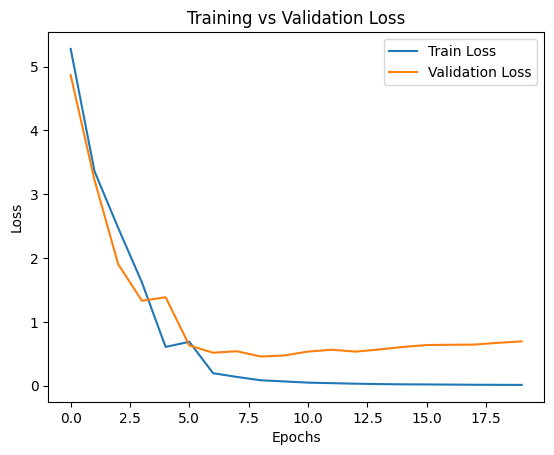

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8000 - loss: 0.5684
Test Accuracy: 0.8000


In [4]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
